In [1]:
import numpy as np
import random
import time

vectors1 = np.loadtxt('Sumedh.txt', delimiter=',')

def l1_distance(A1, A2):
    return np.sum(np.abs(np.array(A1) - np.array(A2)))

def l2_distance(A1, A2):
    return np.sqrt(np.sum((np.array(A1) - np.array(A2))**2))

vv=len(vectors1[0])-1

TT = vectors1[:, vv]
X1 = vectors1[:, :vv]

print("TT: ", TT)
print("X1: ", X1)

TT:  [0.084014 0.003088 0.139547 ... 0.023671 0.015644 2.20173 ]
X1:  [[ 3.00000000e+02  1.12631216e+03  0.00000000e+00 ...  0.00000000e+00
   4.47278000e-01  1.98790000e-01]
 [ 3.00000000e+02  8.49674860e+01  0.00000000e+00 ...  1.00000000e+00
   4.47278000e-01  1.98790000e-01]
 [ 3.00000000e+02  2.08399050e+01  0.00000000e+00 ...  0.00000000e+00
   6.78160000e-02  1.66080000e-02]
 ...
 [ 3.00000000e+02 -4.44359800e+00  8.32300000e+00 ...  1.00000000e+00
   8.49023000e-01  3.18383000e-01]
 [ 3.00000000e+02 -4.46173500e+00  7.05100000e+00 ...  1.00000000e+00
   8.33972000e-01  2.66871000e-01]
 [ 3.00000000e+02 -4.59557600e+00  7.93800000e+00 ...  1.00000000e+00
   8.58153000e-01  3.81401000e-01]]


In [3]:
num_wolves = 20
iterations = 50
ll = 2


num_runs = 1
TOTAL = 150
D=[0]*TOTAL

E=[0]*TOTAL

gmpfc_arr = []
positions_per_iteration = []
time_elapsed_per_run = []

for run in range(1,num_runs+1):

      print(f"Run {run}/{num_runs}")
      # Initialization

      start_time = time.time()

      alpha_position = np.random.choice(X1.shape[0])
      beta_position = np.random.choice(X1.shape[0])
      delta_position = np.random.choice(X1.shape[0])

      print("alpha_position: ", alpha_position)
      print("beta_position: ", beta_position)
      print("delta_position: ", delta_position)

      alpha_score = float('-inf')
      beta_score = float('-inf')
      delta_score = float('-inf')
      FIT = []
      positions = np.random.randint(0, X1.shape[0], size=num_wolves)
      print("positions: ", positions)
      print("len(positions): ", len(positions))

      AA = []
      for i in range(len(positions)):
          AA.append(positions[i])

      counter = 1
      increase = 0
      for iteration in range(iterations):
          print("Current iteration: ", iteration)
          for wolf in range(len(positions)):

            fitness = TT[positions[wolf]]
            if(len(AA)>=TOTAL):
                counter = 0
                break

            if((positions[wolf] in AA)==False): # newly sampled position is not AA, add it
                AA.append(positions[wolf])
                increase = increase + 1


            if fitness > alpha_score:   # If the newly sampled position is larger than the previous alpha_score, then make this wolf the alpha
                delta_score = beta_score  # Shift the current beta to delta
                delta_position = beta_position

                beta_score = alpha_score  # and the current alpha to beta
                beta_position = alpha_position

                alpha_score = fitness # and finally make the newly sampled position wolf the alpha
                alpha_position = positions[wolf]
            elif fitness > beta_score:
                delta_score = beta_score
                delta_position = beta_position

                beta_score = fitness
                beta_position = positions[wolf]
            elif fitness > delta_score:
                delta_score = fitness
                delta_position = positions[wolf]

          #print("Updated wolf hierarchy!")
          print("Total samples taken so far:", len(AA))

          # Removing the weakest performing wolf every so often:
          if ((iteration != 0) and (increase > (len(positions) / 4))): # and (iteration % (num_wolves - 3) == 0)
              print("increase: ", increase, " | (len(positions)): ", len(positions))
              #print("Eliminating a wolf!")
              evaluations = [TT[pos] for pos in positions]
              weakest_wolf_index = evaluations.index(min(evaluations))
              eliminated_wolf_position = positions[weakest_wolf_index]
              positions = np.delete(positions, weakest_wolf_index, axis=0)
              increase = 0
              #print("Eliminated wolf @ ", eliminated_wolf_position)
              print("No. of wolves remaining: ", len(positions))

          a = ll - iteration * (ll / iterations)
          positions_per_iteration_temp = []
          # At this point we've updated the hierarchy/rankings of the wolves.

          for wolf in range(len(positions)):
              r1 = np.random.rand()
              r2 = np.random.rand()

              A1 = ll * a * r1 - a
              C1 = ll * r2

              D_alpha = abs(C1 * X1[alpha_position] - X1[positions[wolf]])  # amount to take alpha's influence
              X1_alpha = X1[alpha_position] - A1 * D_alpha

              r1 = np.random.rand()
              r2 = np.random.rand()

              A2 = ll * a * r1 - a
              C2 = ll * r2

              D_beta = abs(C2 * X1[beta_position] - X1[positions[wolf]])  # amount to take beta's influence
              X1_beta = X1[beta_position] - A2 * D_beta

              r1 = np.random.rand()
              r2 = np.random.rand()

              A3 = ll * a * r1 - a
              C3 = ll * r2

              D_delta = abs(C3 * X1[delta_position] - X1[positions[wolf]]) # amount to take delta's influence
              X1_delta = X1[delta_position] - A3 * D_delta

              new_position = (X1_alpha + X1_beta + X1_delta)/3  # new position is the average of alpha, beta, and delta influence
              positions[wolf] = np.argmin(np.linalg.norm(X1 - new_position, axis=1))
              positions_per_iteration_temp.append(positions[wolf])


          positions_per_iteration.append(positions_per_iteration_temp)
          #print("Updated wolf locations!")
          if(counter==0):
              break

      a1=len(AA)-1 #If AA does not contain TOTAL number of elements, repeat last number. We can (should) take random elements also.
      for i in range(a1, TOTAL):
         AA.append(AA[a1])

      maxi = -10
      C = [0]*TOTAL
      for i in range(TOTAL):
        C[i] = max(maxi,TT[AA[i]])
        maxi = C[i]
      for i in range(TOTAL):
        D[i]=D[i]+C[i]

      for i in range(TOTAL):
         E[i]=round(D[i]/run, 3)

      gmpfc_arr.append(E)

      end_time = time.time()
      elapsed_time = end_time - start_time
      print("Run # ",  run, " completed in ", elapsed_time, " seconds!")
      time_elapsed_per_run.append(elapsed_time)

      print(E)
      print(AA)


      print("positions_per_iteration: ", positions_per_iteration)


Run 1/1
alpha_position:  4735
beta_position:  8354
delta_position:  3783
positions:  [17947 13729  4146 24468 22865   457  8374  5406  2252 22924  7536 10054
  8825  4641  7388 17803   789 24925 14671  2070]
len(positions):  20
Current iteration:  0
Total samples taken so far: 20
Current iteration:  1
Total samples taken so far: 39
increase:  19  | (len(positions)):  20
No. of wolves remaining:  19
Current iteration:  2
Total samples taken so far: 57
increase:  18  | (len(positions)):  19
No. of wolves remaining:  18
Current iteration:  3
Total samples taken so far: 72
increase:  15  | (len(positions)):  18
No. of wolves remaining:  17
Current iteration:  4
Total samples taken so far: 87
increase:  15  | (len(positions)):  17
No. of wolves remaining:  16
Current iteration:  5
Total samples taken so far: 100
increase:  13  | (len(positions)):  16
No. of wolves remaining:  15
Current iteration:  6
Total samples taken so far: 112
increase:  12  | (len(positions)):  15
No. of wolves remain

In [4]:
num_wolves = 25
iterations = 65
ll = 2


num_runs = 50
TOTAL = 150
D=[0]*TOTAL

E=[0]*TOTAL

gmpfc_arr = []
positions_per_iteration = []
time_elapsed_per_run = []

for run in range(1,num_runs+1):

      print(f"Run {run}/{num_runs}")
      start_time = time.time()
      # Initialization
      alpha_position = np.random.choice(X1.shape[0])
      beta_position = np.random.choice(X1.shape[0])
      delta_position = np.random.choice(X1.shape[0])

      #print("alpha_position: ", alpha_position)
      #print("beta_position: ", beta_position)
      #print("delta_position: ", delta_position)

      alpha_score = float('-inf')
      beta_score = float('-inf')
      delta_score = float('-inf')
      FIT = []
      positions = np.random.randint(0, X1.shape[0], size=num_wolves)
      #print("positions: ", positions)
      #print("len(positions): ", len(positions))

      AA = []
      for i in range(len(positions)):
          AA.append(positions[i])

      counter = 1
      increase = 0
      for iteration in range(iterations):
          #print("Current iteration: ", iteration)
          for wolf in range(len(positions)):

            fitness = TT[positions[wolf]]
            if(len(AA)>=TOTAL):
                counter = 0
                break

            if((positions[wolf] in AA)==False): # newly sampled position is not AA, add it
                AA.append(positions[wolf])
                increase = increase + 1


            if fitness > alpha_score:   # If the newly sampled position is larger than the previous alpha_score, then make this wolf the alpha
                delta_score = beta_score  # Shift the current beta to delta
                delta_position = beta_position

                beta_score = alpha_score  # and the current alpha to beta
                beta_position = alpha_position

                alpha_score = fitness # and finally make the newly sampled position wolf the alpha
                alpha_position = positions[wolf]
            elif fitness > beta_score:
                delta_score = beta_score
                delta_position = beta_position

                beta_score = fitness
                beta_position = positions[wolf]
            elif fitness > delta_score:
                delta_score = fitness
                delta_position = positions[wolf]

          #print("Updated wolf hierarchy!")
          #print("Total samples taken so far:", len(AA))

          # Removing the weakest performing wolf every so often:
          if ((iteration != 0) and (increase > (len(positions) / 4))): # and (iteration % (num_wolves - 3) == 0)
              #print("increase: ", increase, " | (len(positions)): ", len(positions))
              #print("Eliminating a wolf!")
              evaluations = [TT[pos] for pos in positions]
              weakest_wolf_index = evaluations.index(min(evaluations))
              eliminated_wolf_position = positions[weakest_wolf_index]
              positions = np.delete(positions, weakest_wolf_index, axis=0)
              increase = 0
              #print("Eliminated wolf @ ", eliminated_wolf_position)
              #print("No. of wolves remaining: ", len(positions))

          a = ll - iteration * (ll / iterations)
          positions_per_iteration_temp = []
          # At this point we've updated the hierarchy/rankings of the wolves.

          for wolf in range(len(positions)):
              r1 = np.random.rand()
              r2 = np.random.rand()

              A1 = ll * a * r1 - a
              C1 = ll * r2

              D_alpha = abs(C1 * X1[alpha_position] - X1[positions[wolf]])  # amount to take alpha's influence
              X1_alpha = X1[alpha_position] - A1 * D_alpha

              r1 = np.random.rand()
              r2 = np.random.rand()

              A2 = ll * a * r1 - a
              C2 = ll * r2

              D_beta = abs(C2 * X1[beta_position] - X1[positions[wolf]])  # amount to take beta's influence
              X1_beta = X1[beta_position] - A2 * D_beta

              r1 = np.random.rand()
              r2 = np.random.rand()

              A3 = ll * a * r1 - a
              C3 = ll * r2

              D_delta = abs(C3 * X1[delta_position] - X1[positions[wolf]]) # amount to take delta's influence
              X1_delta = X1[delta_position] - A3 * D_delta

              new_position = (X1_alpha + X1_beta + X1_delta)/3  # new position is the average of alpha, beta, and delta influence
              positions[wolf] = np.argmin(np.linalg.norm(X1 - new_position, axis=1))
              positions_per_iteration_temp.append(positions[wolf])


          positions_per_iteration.append(positions_per_iteration_temp)
          #print("Updated wolf locations!")
          if(counter==0):
              break

      a1=len(AA)-1 #If AA does not contain TOTAL number of elements, repeat last number. We can (should) take random elements also.
      for i in range(a1, TOTAL):
         AA.append(AA[a1])

      maxi = -10
      C = [0]*TOTAL
      for i in range(TOTAL):
        C[i] = max(maxi,TT[AA[i]])
        maxi = C[i]
      for i in range(TOTAL):
        D[i]=D[i]+C[i]

      for i in range(TOTAL):
         E[i]=round(D[i]/run, 3)

      gmpfc_arr.append(E)
      end_time = time.time()
      elapsed_time = end_time - start_time
      print("Run # ",  run, " completed in ", elapsed_time, " seconds!")
      time_elapsed_per_run.append(elapsed_time)

      print(E)
      print(AA)

      print("positions_per_iteration: ", positions_per_iteration)


# Dumping this data into a .pkl file:
with open('egwo_results.pkl', 'wb') as file:
  pickle.dump({'gmpfc_arr': gmpfc_arr, 'time_elapsed_per_run': time_elapsed_per_run}, file)


Run 1/50
Run #  1  completed in  39.85424470901489  seconds!
[0.355, 0.355, 0.369, 0.501, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 4.247, 5.918, 5.918, 5.918, 5.918, 5.918, 5.918, 5.918, 5.918, 5.918, 6.485, 6.485, 6.664, 6.664, 6.664, 6.664, 6.664, 6.664, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.704, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 7.944, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 8.357, 

Run #  2  completed in  15.263466119766235  seconds!
[0.248, 1.733, 1.74, 1.806, 3.679, 3.679, 3.679, 5.366, 5.366, 5.366, 5.366, 5.366, 6.056, 6.056, 6.056, 6.056, 6.056, 6.056, 6.056, 6.056, 6.891, 6.891, 6.891, 6.891, 6.891, 6.891, 6.891, 6.891, 6.891, 7.175, 7.175, 7.265, 7.265, 7.265, 7.265, 7.265, 7.265, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.964, 7.964, 7.964, 7.964, 7.964, 7.964, 7.964, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17, 8.17,

Run #  3  completed in  7.071029186248779  seconds!
[0.347, 1.337, 1.724, 1.768, 3.017, 3.017, 3.017, 4.905, 4.905, 4.905, 4.905, 4.905, 5.365, 5.365, 5.365, 5.365, 5.602, 5.602, 5.602, 5.602, 6.159, 6.159, 6.159, 6.159, 6.159, 6.159, 6.159, 6.159, 6.159, 6.348, 6.348, 7.254, 7.254, 7.254, 7.254, 7.254, 7.254, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.621, 7.621, 7.621, 7.621, 7.621, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.661, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.711, 7.791, 7.791, 7.791, 7.791, 7.791, 7.791, 7.791, 7.928, 7.928, 7.928, 7.928, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095, 8.095,

Run #  4  completed in  8.698967695236206  seconds!
[0.282, 1.564, 1.855, 1.888, 2.899, 2.899, 2.899, 4.315, 4.315, 4.315, 4.653, 4.653, 4.998, 4.998, 4.998, 4.998, 5.176, 5.176, 5.176, 5.176, 5.594, 5.594, 5.594, 5.594, 5.594, 5.761, 5.761, 5.761, 5.761, 5.903, 5.903, 6.582, 6.582, 6.582, 6.582, 6.582, 6.582, 6.842, 6.842, 7.092, 7.092, 7.092, 7.092, 7.092, 7.092, 7.092, 7.107, 7.107, 7.107, 7.107, 7.107, 7.137, 7.137, 7.259, 7.259, 7.259, 7.259, 7.259, 7.259, 7.259, 7.259, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.533, 7.571, 7.571, 7.571, 7.571, 7.571, 7.571, 7.571, 7.571, 7.63, 7.63, 7.63, 7.63, 7.63, 7.63, 7.63, 7.734, 7.734, 7.734, 7.734, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.859, 7.

Run #  5  completed in  12.010393619537354  seconds!
[1.531, 2.557, 2.79, 2.816, 3.625, 3.625, 3.625, 4.758, 4.758, 4.758, 5.028, 5.028, 5.304, 5.304, 5.304, 5.304, 5.447, 5.447, 5.447, 5.447, 5.781, 5.781, 5.781, 5.781, 5.781, 5.915, 6.205, 6.205, 6.205, 6.319, 6.319, 6.862, 6.862, 6.862, 6.862, 6.862, 6.862, 7.07, 7.07, 7.27, 7.27, 7.27, 7.27, 7.27, 7.27, 7.27, 7.282, 7.282, 7.282, 7.282, 7.282, 7.306, 7.306, 7.404, 7.404, 7.404, 7.404, 7.404, 7.404, 7.404, 7.404, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.623, 7.653, 7.653, 7.653, 7.653, 7.653, 7.653, 7.653, 7.653, 7.701, 7.701, 7.701, 7.701, 7.701, 7.701, 7.701, 7.784, 7.784, 7.784, 7.784, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.884, 7.88

Run #  6  completed in  10.73892092704773  seconds!
[1.284, 2.146, 2.341, 2.367, 3.073, 3.11, 3.11, 4.054, 4.941, 4.941, 5.166, 5.166, 5.396, 5.396, 5.396, 5.396, 5.515, 5.515, 5.515, 5.515, 5.794, 5.794, 5.794, 5.794, 5.794, 5.905, 6.147, 6.147, 6.147, 6.242, 6.242, 6.695, 6.695, 6.695, 6.695, 6.695, 6.695, 7.316, 7.316, 7.483, 7.483, 7.483, 7.483, 7.483, 7.483, 7.483, 7.493, 7.493, 7.493, 7.493, 7.493, 7.513, 7.513, 7.594, 7.594, 7.594, 7.594, 7.594, 7.594, 7.594, 7.594, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.777, 7.802, 7.802, 7.802, 7.802, 7.802, 7.802, 7.802, 7.802, 7.842, 7.842, 7.842, 7.842, 7.842, 7.856, 7.856, 7.925, 7.925, 7.925, 7.925, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.008, 8.00

Run #  7  completed in  7.133228063583374  seconds!
[1.111, 2.401, 2.568, 2.591, 3.196, 3.227, 3.227, 4.315, 5.076, 5.076, 5.269, 5.269, 5.466, 5.466, 5.466, 5.466, 5.568, 5.568, 5.568, 5.568, 5.806, 5.806, 5.806, 5.806, 5.806, 5.902, 6.109, 6.109, 6.109, 6.191, 6.191, 6.627, 6.627, 6.627, 6.627, 6.627, 6.627, 7.16, 7.16, 7.303, 7.303, 7.303, 7.303, 7.495, 7.495, 7.495, 7.504, 7.504, 7.504, 7.504, 7.504, 7.521, 7.521, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.747, 7.768, 7.768, 7.768, 7.768, 7.768, 7.768, 7.768, 7.768, 7.803, 7.803, 7.803, 7.803, 7.803, 7.815, 7.815, 7.874, 7.874, 7.874, 7.874, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945, 7.945

Run #  8  completed in  7.607351064682007  seconds!
[1.041, 2.17, 2.682, 2.702, 3.232, 3.259, 3.259, 4.211, 4.877, 4.877, 5.123, 5.123, 5.296, 5.296, 5.296, 5.296, 5.385, 5.385, 5.385, 5.385, 5.593, 5.593, 5.593, 5.593, 5.593, 5.988, 6.169, 6.169, 6.169, 6.24, 6.24, 6.622, 6.622, 6.622, 6.622, 6.622, 6.622, 7.089, 7.089, 7.214, 7.214, 7.214, 7.214, 7.382, 7.382, 7.382, 7.389, 7.389, 7.389, 7.389, 7.389, 7.414, 7.414, 7.475, 7.475, 7.475, 7.475, 7.475, 7.475, 7.475, 7.475, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.612, 7.63, 7.63, 7.63, 7.63, 7.63, 7.63, 7.63, 7.63, 7.66, 7.66, 7.66, 7.66, 7.66, 7.671, 7.671, 7.723, 7.723, 7.723, 7.723, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.785, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.856, 7.873, 7.873, 7.87

Run #  9  completed in  39.64514994621277  seconds!
[1.0, 2.003, 2.521, 2.539, 3.009, 3.034, 3.034, 3.88, 4.471, 4.471, 4.869, 4.869, 5.022, 5.022, 5.022, 5.022, 5.101, 5.101, 5.101, 5.101, 5.287, 5.287, 5.287, 5.287, 5.287, 5.637, 5.799, 5.799, 5.799, 5.862, 5.862, 6.201, 6.201, 6.201, 6.201, 6.373, 6.373, 6.788, 6.788, 6.899, 6.899, 6.899, 6.899, 7.048, 7.048, 7.048, 7.055, 7.055, 7.055, 7.055, 7.055, 7.076, 7.076, 7.131, 7.131, 7.131, 7.131, 7.131, 7.131, 7.131, 7.131, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.253, 7.418, 7.418, 7.418, 7.418, 7.418, 7.435, 7.435, 7.435, 7.567, 7.567, 7.567, 7.567, 7.567, 7.594, 7.594, 7.594, 7.594, 7.594, 7.604, 7.604, 7.684, 7.684, 7.684, 7.684, 7.739, 7.739, 7.739, 7.739, 7.739, 7.77, 7.77, 7.77, 7.77, 7.77, 7.77, 7.77, 7.77, 7.833, 7.833, 7.833, 7.833, 7.833, 7.833, 7.833, 7.833, 7.833, 7.833, 7.833, 7.833, 7.833, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.905, 7.905, 7.905, 7

Run #  10  completed in  5.978501319885254  seconds!
[1.31, 2.213, 2.679, 2.695, 3.119, 3.141, 3.141, 3.902, 4.435, 4.435, 4.792, 4.792, 4.93, 4.93, 4.93, 4.93, 5.001, 5.001, 5.019, 5.019, 5.186, 5.186, 5.186, 5.186, 5.186, 5.502, 5.647, 5.647, 5.891, 5.947, 5.947, 6.253, 6.253, 6.253, 6.253, 6.408, 6.408, 6.781, 6.781, 6.881, 6.881, 6.881, 6.881, 7.015, 7.015, 7.015, 7.021, 7.021, 7.021, 7.021, 7.021, 7.041, 7.041, 7.089, 7.089, 7.089, 7.089, 7.089, 7.089, 7.089, 7.089, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.199, 7.348, 7.365, 7.365, 7.365, 7.365, 7.486, 7.486, 7.486, 7.605, 7.605, 7.605, 7.605, 7.605, 7.629, 7.629, 7.629, 7.629, 7.629, 7.638, 7.638, 7.71, 7.71, 7.71, 7.71, 7.76, 7.76, 7.76, 7.76, 7.76, 7.787, 7.787, 7.787, 7.787, 7.787, 7.787, 7.787, 7.787, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.844, 7.895, 7.895, 7.895, 7.895, 7.895, 7.895, 7.895, 7.895, 7.895, 7.909, 7.909, 7

Run #  11  completed in  45.57749009132385  seconds!
[1.249, 2.07, 2.494, 3.068, 3.453, 3.473, 3.473, 4.165, 4.649, 4.649, 4.974, 4.974, 5.099, 5.099, 5.099, 5.099, 5.164, 5.164, 5.181, 5.181, 5.332, 5.332, 5.332, 5.332, 5.332, 5.619, 5.751, 5.751, 5.973, 6.084, 6.084, 6.361, 6.361, 6.361, 6.361, 6.502, 6.502, 6.841, 6.841, 6.932, 6.932, 6.932, 6.932, 7.054, 7.054, 7.054, 7.06, 7.06, 7.06, 7.06, 7.06, 7.081, 7.081, 7.126, 7.126, 7.126, 7.126, 7.126, 7.126, 7.126, 7.126, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.266, 7.401, 7.416, 7.416, 7.416, 7.416, 7.526, 7.526, 7.526, 7.635, 7.656, 7.656, 7.656, 7.656, 7.677, 7.677, 7.677, 7.677, 7.677, 7.685, 7.685, 7.751, 7.751, 7.751, 7.751, 7.796, 7.796, 7.796, 7.796, 7.796, 7.821, 7.821, 7.821, 7.821, 7.821, 7.821, 7.821, 7.821, 7.873, 7.873, 7.873, 7.873, 7.873, 7.873, 7.873, 7.873, 7.873, 7.873, 7.873, 7.873, 7.873, 7.919, 7.919, 7.919, 7.919, 7.919, 7.919, 7.919, 7.919, 7.919, 7.932, 

Run #  12  completed in  40.22988224029541  seconds!
[1.197, 1.95, 2.338, 3.541, 3.894, 3.913, 3.913, 4.547, 4.991, 4.991, 5.289, 5.289, 5.404, 5.404, 5.404, 5.404, 5.463, 5.463, 5.478, 5.478, 5.617, 5.617, 5.617, 5.617, 5.617, 5.88, 6.001, 6.001, 6.204, 6.306, 6.306, 6.56, 6.56, 6.56, 6.56, 6.689, 6.689, 7.0, 7.0, 7.084, 7.084, 7.084, 7.084, 7.196, 7.196, 7.196, 7.201, 7.201, 7.201, 7.201, 7.201, 7.221, 7.221, 7.261, 7.261, 7.261, 7.261, 7.261, 7.261, 7.261, 7.261, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.353, 7.39, 7.514, 7.528, 7.528, 7.528, 7.528, 7.628, 7.628, 7.628, 7.728, 7.747, 7.747, 7.747, 7.747, 7.767, 7.767, 7.767, 7.767, 7.767, 7.774, 7.774, 7.834, 7.834, 7.834, 7.834, 7.876, 7.876, 7.876, 7.876, 7.876, 7.899, 7.899, 7.899, 7.899, 7.899, 7.899, 7.899, 7.899, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.989, 7.989, 7.989, 7.989, 7.989, 7.989, 7.989, 7.989, 7.989, 8.0, 8.0, 8.

Run #  13  completed in  43.61075448989868  seconds!
[1.139, 2.13, 2.489, 3.6, 3.925, 3.942, 3.942, 4.528, 4.938, 4.938, 5.213, 5.213, 5.319, 5.319, 5.319, 5.319, 5.374, 5.374, 5.387, 5.387, 5.516, 5.516, 5.516, 5.516, 5.516, 5.758, 5.87, 5.87, 6.058, 6.151, 6.151, 6.386, 6.386, 6.386, 6.386, 6.505, 6.505, 6.792, 6.792, 6.869, 6.869, 6.869, 6.869, 6.973, 6.973, 6.973, 6.977, 6.977, 6.977, 6.977, 6.977, 6.996, 6.996, 7.033, 7.076, 7.076, 7.076, 7.076, 7.291, 7.291, 7.291, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.409, 7.524, 7.617, 7.617, 7.617, 7.617, 7.71, 7.71, 7.71, 7.802, 7.819, 7.819, 7.819, 7.819, 7.837, 7.837, 7.837, 7.837, 7.837, 7.844, 7.844, 7.899, 7.899, 7.899, 7.899, 7.938, 7.938, 7.938, 7.938, 7.938, 7.959, 7.959, 7.959, 7.959, 7.959, 7.959, 7.959, 7.959, 8.003, 8.003, 8.003, 8.003, 8.003, 8.003, 8.003, 8.003, 8.003, 8.003, 8.003, 8.003, 8.003, 8.042, 8.042, 8.042, 8.042, 8.042, 8.042, 8.042, 8.042, 8.042, 8.053, 8.

Run #  14  completed in  6.573403596878052  seconds!
[1.061, 2.014, 2.347, 3.378, 3.68, 3.935, 3.935, 4.479, 4.86, 4.86, 5.206, 5.206, 5.305, 5.305, 5.305, 5.305, 5.355, 5.355, 5.368, 5.368, 5.488, 5.488, 5.488, 5.488, 5.488, 5.713, 5.978, 5.978, 6.152, 6.239, 6.239, 6.457, 6.457, 6.457, 6.457, 6.568, 6.568, 6.834, 6.834, 6.905, 6.905, 6.905, 6.905, 7.002, 7.002, 7.002, 7.006, 7.006, 7.006, 7.006, 7.006, 7.023, 7.023, 7.058, 7.097, 7.097, 7.097, 7.097, 7.297, 7.297, 7.297, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.375, 7.407, 7.514, 7.599, 7.599, 7.599, 7.599, 7.686, 7.686, 7.686, 7.771, 7.787, 7.787, 7.787, 7.787, 7.805, 7.845, 7.845, 7.845, 7.845, 7.851, 7.851, 7.903, 7.903, 7.903, 7.903, 7.938, 7.938, 7.938, 7.938, 7.938, 7.958, 7.958, 7.958, 7.958, 7.958, 7.958, 7.958, 7.958, 7.999, 7.999, 7.999, 7.999, 7.999, 7.999, 7.999, 7.999, 7.999, 7.999, 7.999, 7.999, 7.999, 8.035, 8.035, 8.035, 8.035, 8.035, 8.035, 8.035, 8.035, 8.035, 8.04

Run #  15  completed in  38.28792762756348  seconds!
[0.99, 1.908, 2.219, 3.185, 3.467, 4.059, 4.059, 4.567, 4.922, 4.922, 5.245, 5.245, 5.337, 5.337, 5.337, 5.337, 5.384, 5.384, 5.396, 5.396, 5.508, 5.508, 5.508, 5.508, 5.508, 5.718, 6.031, 6.031, 6.193, 6.274, 6.274, 6.478, 6.478, 6.478, 6.478, 6.581, 6.581, 6.83, 6.83, 6.896, 6.896, 6.896, 6.929, 7.018, 7.018, 7.018, 7.023, 7.023, 7.023, 7.023, 7.023, 7.038, 7.038, 7.071, 7.108, 7.108, 7.108, 7.108, 7.294, 7.294, 7.294, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.367, 7.397, 7.496, 7.577, 7.577, 7.577, 7.672, 7.752, 7.752, 7.752, 7.832, 7.847, 7.847, 7.847, 7.847, 7.863, 7.901, 7.901, 7.901, 7.901, 7.907, 7.907, 7.955, 7.955, 7.955, 7.955, 7.988, 7.988, 7.988, 7.988, 7.988, 8.006, 8.006, 8.006, 8.006, 8.006, 8.006, 8.006, 8.006, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.044, 8.078, 8.078, 8.078, 8.078, 8.078, 8.078, 8.078, 8.078, 8.078, 8.08

Run #  16  completed in  9.143582344055176  seconds!
[0.953, 1.813, 2.104, 3.186, 3.451, 4.006, 4.006, 4.482, 4.814, 4.814, 5.14, 5.14, 5.227, 5.227, 5.227, 5.227, 5.271, 5.271, 5.282, 5.282, 5.387, 5.387, 5.387, 5.387, 5.387, 5.588, 5.881, 5.881, 6.033, 6.109, 6.109, 6.358, 6.358, 6.358, 6.358, 6.454, 6.454, 6.688, 6.688, 6.75, 6.75, 6.75, 6.781, 6.865, 6.865, 6.865, 6.868, 6.868, 6.868, 6.868, 6.972, 6.987, 6.987, 7.018, 7.052, 7.052, 7.052, 7.052, 7.227, 7.227, 7.227, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.296, 7.324, 7.448, 7.523, 7.523, 7.523, 7.613, 7.688, 7.688, 7.688, 7.763, 7.777, 7.777, 7.777, 7.777, 7.792, 7.827, 7.827, 7.827, 7.827, 7.833, 7.833, 7.878, 7.878, 7.878, 7.878, 7.909, 7.909, 7.909, 7.909, 7.909, 7.926, 7.926, 7.926, 7.926, 7.926, 7.926, 7.926, 7.926, 7.965, 7.965, 7.965, 7.965, 7.965, 7.965, 7.965, 7.965, 7.965, 7.965, 7.965, 7.965, 7.965, 7.997, 7.997, 7.997, 7.997, 7.997, 7.997, 7.997, 8.052, 8.052, 8.06, 

Run #  17  completed in  14.828776597976685  seconds!
[0.905, 1.747, 2.022, 3.04, 3.289, 3.811, 4.044, 4.492, 4.806, 4.806, 5.205, 5.23, 5.311, 5.311, 5.311, 5.311, 5.353, 5.353, 5.405, 5.405, 5.504, 5.504, 5.504, 5.504, 5.504, 5.693, 5.968, 5.968, 6.112, 6.183, 6.183, 6.417, 6.417, 6.417, 6.417, 6.508, 6.508, 6.728, 6.728, 6.787, 6.787, 6.787, 6.815, 6.894, 6.894, 6.894, 6.898, 6.898, 6.898, 6.898, 6.996, 7.01, 7.01, 7.039, 7.071, 7.071, 7.071, 7.071, 7.269, 7.269, 7.269, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.334, 7.36, 7.477, 7.548, 7.548, 7.548, 7.632, 7.703, 7.703, 7.703, 7.774, 7.787, 7.787, 7.787, 7.787, 7.801, 7.834, 7.834, 7.834, 7.834, 7.839, 7.839, 7.882, 7.882, 7.882, 7.882, 7.911, 7.911, 7.911, 7.911, 7.911, 7.927, 7.927, 7.927, 7.927, 7.927, 7.927, 7.927, 7.927, 7.963, 7.963, 7.963, 7.963, 7.963, 7.963, 7.963, 7.963, 7.963, 7.963, 7.963, 7.963, 7.963, 7.993, 7.993, 7.993, 7.993, 7.993, 7.993, 8.016, 8.068, 8.068, 8.076

Run #  18  completed in  40.39415144920349  seconds!
[0.886, 1.682, 1.941, 2.903, 3.322, 3.815, 4.035, 4.458, 4.754, 4.776, 5.153, 5.177, 5.253, 5.253, 5.253, 5.253, 5.293, 5.459, 5.508, 5.508, 5.601, 5.601, 5.601, 5.601, 5.601, 5.779, 6.04, 6.04, 6.175, 6.243, 6.243, 6.464, 6.464, 6.464, 6.464, 6.55, 6.55, 6.757, 6.757, 6.826, 6.826, 6.826, 6.853, 6.927, 6.927, 6.927, 6.931, 6.931, 6.931, 6.931, 7.023, 7.036, 7.036, 7.064, 7.094, 7.094, 7.094, 7.094, 7.282, 7.282, 7.282, 7.342, 7.342, 7.342, 7.342, 7.342, 7.342, 7.342, 7.342, 7.342, 7.342, 7.342, 7.351, 7.351, 7.351, 7.376, 7.487, 7.554, 7.554, 7.554, 7.633, 7.7, 7.7, 7.7, 7.767, 7.779, 7.779, 7.779, 7.779, 7.792, 7.824, 7.824, 7.824, 7.824, 7.829, 7.829, 7.869, 7.869, 7.869, 7.869, 7.897, 7.897, 7.897, 7.897, 7.897, 7.912, 7.912, 7.912, 7.912, 7.912, 7.912, 7.912, 7.912, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.946, 7.974, 7.974, 7.974, 7.974, 7.974, 7.974, 7.996, 8.045, 8.045, 8.052, 8.05

Run #  19  completed in  36.916059732437134  seconds!
[0.88, 1.634, 1.879, 2.79, 3.188, 3.655, 3.939, 4.43, 4.711, 4.731, 5.089, 5.142, 5.215, 5.215, 5.215, 5.215, 5.252, 5.41, 5.456, 5.456, 5.544, 5.544, 5.544, 5.544, 5.562, 5.731, 5.978, 5.978, 6.161, 6.226, 6.226, 6.435, 6.435, 6.435, 6.435, 6.516, 6.516, 6.713, 6.713, 6.778, 6.778, 6.778, 6.803, 6.874, 6.874, 6.874, 6.877, 6.877, 6.877, 6.877, 6.965, 6.977, 6.977, 7.003, 7.032, 7.032, 7.032, 7.032, 7.209, 7.209, 7.209, 7.267, 7.267, 7.267, 7.267, 7.267, 7.267, 7.267, 7.267, 7.267, 7.267, 7.267, 7.276, 7.276, 7.276, 7.299, 7.404, 7.598, 7.598, 7.598, 7.673, 7.736, 7.736, 7.736, 7.799, 7.811, 7.811, 7.811, 7.811, 7.824, 7.854, 7.854, 7.854, 7.854, 7.858, 7.858, 7.896, 7.896, 7.896, 7.896, 7.922, 7.922, 7.922, 7.922, 7.922, 7.937, 7.937, 7.937, 7.937, 7.937, 7.953, 7.953, 7.953, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 8.012, 8.012, 8.012, 8.012, 8.012, 8.012, 8.032, 8.078, 8.078, 8.08

Run #  20  completed in  9.272180080413818  seconds!
[0.836, 1.552, 1.804, 2.681, 3.059, 3.503, 3.944, 4.41, 4.676, 4.696, 5.036, 5.086, 5.155, 5.155, 5.155, 5.155, 5.191, 5.34, 5.384, 5.384, 5.468, 5.468, 5.468, 5.468, 5.485, 5.646, 5.88, 5.88, 6.054, 6.115, 6.115, 6.314, 6.314, 6.314, 6.314, 6.392, 6.392, 6.647, 6.647, 6.709, 6.709, 6.709, 6.733, 6.801, 6.801, 6.801, 6.804, 6.804, 6.804, 6.804, 6.887, 6.899, 6.899, 6.923, 6.951, 6.951, 6.951, 6.966, 7.135, 7.135, 7.135, 7.189, 7.189, 7.189, 7.189, 7.276, 7.276, 7.276, 7.276, 7.276, 7.283, 7.283, 7.291, 7.291, 7.291, 7.313, 7.429, 7.613, 7.613, 7.613, 7.684, 7.744, 7.744, 7.744, 7.804, 7.816, 7.816, 7.816, 7.816, 7.828, 7.856, 7.856, 7.856, 7.856, 7.86, 7.86, 7.896, 7.896, 7.896, 7.896, 7.921, 7.921, 7.921, 7.921, 7.921, 7.935, 7.935, 7.935, 7.935, 7.935, 7.95, 7.95, 7.95, 7.98, 7.98, 7.98, 7.98, 7.98, 7.98, 7.98, 7.98, 7.98, 7.98, 7.98, 7.98, 7.98, 8.006, 8.006, 8.006, 8.006, 8.006, 8.006, 8.025, 8.069, 8.069, 8.076, 8.076, 8.087, 8.

Run #  21  completed in  6.934193849563599  seconds!
[0.902, 1.585, 1.824, 2.66, 3.02, 3.442, 3.881, 4.326, 4.579, 4.598, 4.921, 4.97, 5.035, 5.035, 5.035, 5.035, 5.069, 5.212, 5.254, 5.303, 5.383, 5.383, 5.383, 5.383, 5.399, 5.552, 5.775, 5.775, 5.941, 6.082, 6.082, 6.272, 6.272, 6.272, 6.272, 6.345, 6.345, 6.589, 6.589, 6.647, 6.647, 6.647, 6.671, 6.735, 6.735, 6.735, 6.738, 6.738, 6.738, 6.738, 6.817, 6.828, 6.828, 6.851, 6.878, 6.878, 6.896, 6.929, 7.089, 7.089, 7.089, 7.141, 7.141, 7.141, 7.141, 7.224, 7.224, 7.224, 7.224, 7.224, 7.231, 7.231, 7.287, 7.287, 7.287, 7.308, 7.418, 7.593, 7.593, 7.593, 7.661, 7.719, 7.719, 7.719, 7.776, 7.787, 7.787, 7.787, 7.787, 7.798, 7.825, 7.825, 7.825, 7.825, 7.829, 7.829, 7.863, 7.863, 7.863, 7.863, 7.887, 7.887, 7.887, 7.887, 7.887, 7.9, 7.9, 7.9, 7.9, 7.9, 7.914, 7.914, 7.931, 7.96, 7.96, 7.96, 7.96, 7.96, 7.96, 7.96, 7.96, 7.96, 7.96, 7.96, 7.96, 7.96, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 8.003, 8.045, 8.045, 8.052, 8.052, 8.062, 8.062,

Run #  22  completed in  6.9395716190338135  seconds!
[0.879, 1.589, 2.063, 2.861, 3.205, 3.608, 4.027, 4.451, 4.693, 4.711, 5.02, 5.066, 5.129, 5.129, 5.129, 5.129, 5.161, 5.297, 5.337, 5.384, 5.46, 5.46, 5.46, 5.46, 5.476, 5.622, 5.835, 5.835, 5.993, 6.128, 6.128, 6.309, 6.309, 6.309, 6.309, 6.379, 6.379, 6.615, 6.615, 6.671, 6.671, 6.671, 6.693, 6.754, 6.754, 6.754, 6.757, 6.757, 6.757, 6.757, 6.833, 6.844, 6.844, 6.866, 6.891, 6.891, 6.908, 6.94, 7.093, 7.093, 7.093, 7.143, 7.18, 7.18, 7.18, 7.258, 7.258, 7.258, 7.258, 7.258, 7.265, 7.265, 7.319, 7.319, 7.319, 7.339, 7.444, 7.611, 7.611, 7.611, 7.676, 7.731, 7.731, 7.731, 7.785, 7.795, 7.795, 7.795, 7.795, 7.806, 7.832, 7.832, 7.832, 7.832, 7.836, 7.836, 7.869, 7.869, 7.869, 7.869, 7.891, 7.891, 7.891, 7.891, 7.891, 7.904, 7.904, 7.904, 7.904, 7.904, 7.918, 7.918, 7.934, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.985, 7.985, 7.985, 7.985, 7.985, 7.985, 8.002, 8.042, 8.042, 8.049, 8.

Run #  23  completed in  7.397781610488892  seconds!
[0.849, 1.537, 1.999, 3.049, 3.377, 3.763, 4.164, 4.569, 4.801, 4.818, 5.113, 5.157, 5.217, 5.217, 5.217, 5.217, 5.248, 5.378, 5.417, 5.462, 5.535, 5.535, 5.535, 5.535, 5.549, 5.689, 5.893, 5.893, 6.044, 6.173, 6.173, 6.346, 6.346, 6.346, 6.346, 6.413, 6.413, 6.639, 6.639, 6.693, 6.693, 6.693, 6.714, 6.772, 6.772, 6.772, 6.775, 6.775, 6.775, 6.775, 6.847, 6.858, 6.858, 6.879, 6.903, 6.903, 6.92, 6.949, 7.096, 7.096, 7.096, 7.144, 7.179, 7.179, 7.179, 7.254, 7.254, 7.254, 7.254, 7.254, 7.261, 7.261, 7.312, 7.312, 7.312, 7.332, 7.432, 7.592, 7.592, 7.592, 7.654, 7.706, 7.706, 7.706, 7.758, 7.768, 7.768, 7.768, 7.768, 7.779, 7.803, 7.803, 7.803, 7.803, 7.807, 7.807, 7.838, 7.838, 7.838, 7.838, 7.86, 7.86, 7.86, 7.86, 7.86, 7.872, 7.872, 7.872, 7.872, 7.872, 7.885, 7.885, 7.913, 7.939, 7.939, 7.939, 7.939, 7.939, 7.939, 7.939, 7.939, 7.939, 7.939, 7.939, 7.939, 7.939, 7.962, 7.962, 7.962, 7.962, 7.962, 7.962, 7.978, 8.017, 8.017, 8.023, 

Run #  24  completed in  35.59014654159546  seconds!
[0.821, 1.48, 1.923, 3.048, 3.382, 3.751, 4.136, 4.524, 4.884, 4.9, 5.183, 5.226, 5.283, 5.283, 5.283, 5.283, 5.313, 5.437, 5.474, 5.517, 5.587, 5.587, 5.587, 5.587, 5.601, 5.735, 5.93, 5.93, 6.088, 6.211, 6.211, 6.377, 6.377, 6.377, 6.377, 6.441, 6.441, 6.658, 6.658, 6.709, 6.709, 6.709, 6.729, 6.786, 6.786, 6.786, 6.788, 6.788, 6.788, 6.793, 6.893, 6.903, 6.903, 6.923, 6.946, 6.946, 6.962, 6.991, 7.131, 7.131, 7.131, 7.177, 7.211, 7.211, 7.211, 7.283, 7.283, 7.283, 7.289, 7.289, 7.295, 7.295, 7.344, 7.344, 7.344, 7.363, 7.459, 7.612, 7.612, 7.612, 7.672, 7.722, 7.722, 7.722, 7.772, 7.781, 7.781, 7.781, 7.781, 7.791, 7.815, 7.815, 7.815, 7.815, 7.818, 7.818, 7.848, 7.848, 7.848, 7.848, 7.869, 7.869, 7.869, 7.88, 7.88, 7.891, 7.891, 7.891, 7.891, 7.891, 7.904, 7.904, 7.93, 7.956, 7.956, 7.956, 7.956, 7.956, 7.956, 7.956, 7.956, 7.956, 7.956, 7.956, 7.956, 7.956, 7.977, 7.977, 7.977, 7.977, 7.991, 7.991, 8.008, 8.044, 8.044, 8.05, 8.0

Run #  25  completed in  9.411757946014404  seconds!
[0.804, 1.437, 1.953, 3.033, 3.353, 3.708, 4.077, 4.45, 4.795, 4.857, 5.129, 5.17, 5.225, 5.225, 5.225, 5.225, 5.253, 5.373, 5.45, 5.492, 5.559, 5.559, 5.559, 5.559, 5.572, 5.701, 5.888, 5.888, 6.039, 6.158, 6.158, 6.317, 6.317, 6.317, 6.317, 6.379, 6.379, 6.587, 6.587, 6.636, 6.636, 6.636, 6.655, 6.709, 6.709, 6.709, 6.712, 6.712, 6.712, 6.716, 6.813, 6.822, 6.822, 6.842, 6.864, 6.864, 6.879, 6.906, 7.041, 7.049, 7.049, 7.093, 7.125, 7.125, 7.125, 7.195, 7.195, 7.195, 7.2, 7.2, 7.206, 7.206, 7.253, 7.253, 7.253, 7.271, 7.363, 7.511, 7.524, 7.524, 7.581, 7.629, 7.672, 7.672, 7.72, 7.729, 7.729, 7.729, 7.729, 7.738, 7.761, 7.761, 7.761, 7.761, 7.764, 7.805, 7.834, 7.834, 7.834, 7.834, 7.854, 7.854, 7.854, 7.864, 7.864, 7.875, 7.875, 7.875, 7.875, 7.875, 7.887, 7.887, 7.913, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.957, 7.957, 7.957, 7.957, 7.971, 7.971, 7.987, 8.022, 8.022, 8.027, 8.

Run #  26  completed in  8.857765436172485  seconds!
[0.79, 1.403, 2.026, 3.064, 3.372, 3.863, 4.218, 4.576, 4.908, 4.968, 5.229, 5.268, 5.321, 5.321, 5.321, 5.321, 5.349, 5.464, 5.538, 5.578, 5.642, 5.642, 5.642, 5.642, 5.655, 5.779, 5.959, 5.959, 6.104, 6.218, 6.218, 6.371, 6.371, 6.371, 6.371, 6.431, 6.431, 6.631, 6.631, 6.678, 6.678, 6.678, 6.697, 6.749, 6.749, 6.749, 6.751, 6.751, 6.751, 6.755, 6.848, 6.857, 6.857, 6.876, 6.897, 6.897, 6.912, 6.938, 7.068, 7.075, 7.075, 7.118, 7.149, 7.149, 7.149, 7.215, 7.215, 7.215, 7.221, 7.221, 7.226, 7.226, 7.272, 7.272, 7.272, 7.289, 7.378, 7.519, 7.532, 7.532, 7.595, 7.641, 7.682, 7.682, 7.728, 7.737, 7.737, 7.737, 7.737, 7.746, 7.768, 7.768, 7.768, 7.768, 7.771, 7.811, 7.838, 7.838, 7.838, 7.838, 7.857, 7.857, 7.857, 7.867, 7.867, 7.878, 7.878, 7.878, 7.878, 7.878, 7.889, 7.889, 7.914, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.937, 7.957, 7.957, 7.957, 7.957, 7.97, 7.97, 7.985, 8.019, 8.019, 8.02

Run #  27  completed in  32.76099228858948  seconds!
[0.762, 1.352, 1.952, 2.985, 3.282, 3.755, 4.096, 4.442, 4.762, 4.819, 5.071, 5.332, 5.383, 5.383, 5.383, 5.383, 5.41, 5.52, 5.592, 5.63, 5.692, 5.692, 5.692, 5.692, 5.705, 5.824, 5.997, 5.997, 6.137, 6.247, 6.247, 6.394, 6.394, 6.394, 6.394, 6.452, 6.452, 6.644, 6.644, 6.69, 6.69, 6.69, 6.708, 6.758, 6.758, 6.758, 6.76, 6.76, 6.76, 6.764, 6.853, 6.862, 6.862, 6.88, 6.901, 6.901, 6.915, 6.94, 7.065, 7.072, 7.072, 7.113, 7.143, 7.143, 7.143, 7.207, 7.207, 7.207, 7.212, 7.212, 7.218, 7.218, 7.262, 7.262, 7.262, 7.278, 7.363, 7.5, 7.512, 7.518, 7.579, 7.624, 7.663, 7.663, 7.708, 7.716, 7.716, 7.716, 7.716, 7.725, 7.746, 7.746, 7.746, 7.746, 7.749, 7.787, 7.813, 7.813, 7.813, 7.813, 7.832, 7.832, 7.832, 7.841, 7.841, 7.852, 7.852, 7.852, 7.852, 7.852, 7.863, 7.863, 7.886, 7.909, 7.909, 7.909, 7.909, 7.909, 7.909, 7.909, 7.909, 7.909, 7.909, 7.909, 7.909, 7.909, 7.928, 7.928, 7.928, 7.928, 7.941, 7.941, 7.955, 7.988, 7.988, 7.993, 7.993, 

Run #  28  completed in  6.806924819946289  seconds!
[0.738, 1.311, 1.889, 2.895, 3.181, 3.637, 4.092, 4.425, 4.872, 4.928, 5.17, 5.423, 5.472, 5.472, 5.472, 5.472, 5.497, 5.604, 5.673, 5.71, 5.77, 5.77, 5.77, 5.77, 5.782, 5.897, 6.064, 6.064, 6.199, 6.305, 6.305, 6.447, 6.447, 6.447, 6.447, 6.502, 6.502, 6.688, 6.688, 6.732, 6.732, 6.732, 6.749, 6.797, 6.797, 6.797, 6.799, 6.799, 6.799, 6.803, 6.889, 6.898, 6.898, 6.915, 6.935, 6.935, 6.949, 6.973, 7.094, 7.101, 7.101, 7.14, 7.169, 7.169, 7.169, 7.231, 7.231, 7.231, 7.236, 7.236, 7.241, 7.241, 7.283, 7.283, 7.283, 7.299, 7.381, 7.513, 7.524, 7.531, 7.589, 7.633, 7.671, 7.671, 7.713, 7.721, 7.721, 7.721, 7.721, 7.73, 7.75, 7.75, 7.75, 7.75, 7.753, 7.79, 7.815, 7.815, 7.815, 7.815, 7.833, 7.833, 7.833, 7.842, 7.842, 7.852, 7.852, 7.852, 7.852, 7.852, 7.863, 7.863, 7.885, 7.907, 7.907, 7.907, 7.907, 7.907, 7.907, 7.907, 7.907, 7.907, 7.907, 7.911, 7.911, 7.911, 7.93, 7.93, 7.93, 7.93, 7.942, 7.942, 7.956, 7.987, 7.987, 7.992, 7.992, 8.0,

Run #  29  completed in  10.97461724281311  seconds!
[0.792, 1.345, 1.904, 2.875, 3.151, 3.591, 4.031, 4.353, 4.784, 4.904, 5.138, 5.382, 5.429, 5.429, 5.429, 5.429, 5.454, 5.557, 5.623, 5.659, 5.717, 5.717, 5.717, 5.717, 5.729, 5.839, 6.001, 6.001, 6.131, 6.233, 6.233, 6.371, 6.371, 6.371, 6.371, 6.424, 6.424, 6.603, 6.604, 6.647, 6.647, 6.647, 6.664, 6.71, 6.71, 6.71, 6.712, 6.712, 6.797, 6.801, 6.884, 6.892, 6.892, 6.909, 6.928, 6.928, 6.941, 6.965, 7.081, 7.088, 7.088, 7.125, 7.154, 7.154, 7.154, 7.213, 7.213, 7.213, 7.218, 7.218, 7.223, 7.223, 7.264, 7.264, 7.264, 7.279, 7.359, 7.485, 7.497, 7.503, 7.56, 7.601, 7.638, 7.638, 7.679, 7.687, 7.687, 7.687, 7.687, 7.695, 7.715, 7.715, 7.715, 7.715, 7.718, 7.753, 7.778, 7.778, 7.778, 7.778, 7.795, 7.795, 7.795, 7.804, 7.804, 7.813, 7.813, 7.813, 7.813, 7.813, 7.823, 7.823, 7.845, 7.866, 7.866, 7.866, 7.866, 7.866, 7.866, 7.866, 7.866, 7.866, 7.866, 7.871, 7.871, 7.871, 7.888, 7.888, 7.888, 7.888, 7.93, 7.93, 7.944, 7.974, 7.974, 7.979, 

Run #  30  completed in  19.958853244781494  seconds!
[0.769, 1.315, 1.855, 2.793, 3.196, 3.621, 4.046, 4.357, 4.775, 4.89, 5.117, 5.352, 5.398, 5.398, 5.398, 5.398, 5.422, 5.521, 5.586, 5.62, 5.676, 5.676, 5.676, 5.676, 5.688, 5.794, 5.951, 6.006, 6.132, 6.231, 6.231, 6.363, 6.363, 6.363, 6.363, 6.434, 6.434, 6.607, 6.608, 6.65, 6.65, 6.65, 6.666, 6.711, 6.711, 6.711, 6.713, 6.713, 6.794, 6.798, 6.879, 6.886, 6.886, 6.903, 6.921, 6.921, 6.934, 6.957, 7.069, 7.076, 7.076, 7.112, 7.139, 7.139, 7.139, 7.197, 7.197, 7.197, 7.202, 7.202, 7.206, 7.206, 7.246, 7.246, 7.246, 7.261, 7.338, 7.46, 7.471, 7.477, 7.532, 7.572, 7.608, 7.608, 7.647, 7.655, 7.655, 7.655, 7.655, 7.663, 7.682, 7.682, 7.682, 7.682, 7.685, 7.719, 7.743, 7.743, 7.743, 7.743, 7.759, 7.759, 7.759, 7.768, 7.768, 7.777, 7.777, 7.777, 7.777, 7.777, 7.787, 7.787, 7.81, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.83, 7.834, 7.834, 7.834, 7.851, 7.851, 7.887, 7.887, 7.928, 7.928, 7.941, 7.97, 7.97, 7.975, 7.975, 7.982

Run #  31  completed in  11.193326473236084  seconds!
[0.758, 1.286, 1.808, 2.726, 3.116, 3.528, 3.939, 4.24, 4.644, 4.756, 4.975, 5.203, 5.261, 5.322, 5.322, 5.322, 5.345, 5.441, 5.503, 5.573, 5.627, 5.627, 5.627, 5.627, 5.638, 5.742, 5.893, 5.946, 6.068, 6.164, 6.164, 6.292, 6.292, 6.292, 6.301, 6.369, 6.369, 6.582, 6.583, 6.623, 6.623, 6.623, 6.639, 6.682, 6.682, 6.682, 6.684, 6.684, 6.763, 6.767, 6.895, 6.903, 6.903, 6.919, 6.937, 6.937, 6.949, 6.971, 7.08, 7.086, 7.086, 7.121, 7.148, 7.148, 7.148, 7.203, 7.203, 7.203, 7.208, 7.208, 7.212, 7.212, 7.251, 7.251, 7.251, 7.265, 7.339, 7.458, 7.469, 7.475, 7.527, 7.566, 7.601, 7.601, 7.639, 7.647, 7.647, 7.647, 7.647, 7.654, 7.673, 7.673, 7.673, 7.673, 7.675, 7.708, 7.731, 7.731, 7.731, 7.731, 7.748, 7.748, 7.748, 7.756, 7.756, 7.765, 7.765, 7.765, 7.765, 7.765, 7.774, 7.774, 7.796, 7.816, 7.816, 7.816, 7.816, 7.816, 7.816, 7.816, 7.816, 7.816, 7.816, 7.82, 7.82, 7.82, 7.836, 7.836, 7.872, 7.872, 7.911, 7.911, 7.929, 7.957, 7.957, 7.962

Run #  32  completed in  7.909855842590332  seconds!
[0.953, 1.465, 1.971, 2.86, 3.238, 3.636, 4.035, 4.326, 4.718, 4.826, 5.038, 5.259, 5.315, 5.374, 5.374, 5.374, 5.397, 5.49, 5.55, 5.618, 5.67, 5.67, 5.67, 5.67, 5.681, 5.781, 5.928, 5.979, 6.097, 6.19, 6.19, 6.314, 6.314, 6.314, 6.323, 6.389, 6.389, 6.595, 6.596, 6.635, 6.635, 6.635, 6.65, 6.703, 6.703, 6.703, 6.705, 6.705, 6.781, 6.785, 6.909, 6.917, 6.917, 6.932, 6.949, 6.949, 6.961, 6.983, 7.088, 7.094, 7.094, 7.129, 7.154, 7.154, 7.154, 7.209, 7.209, 7.209, 7.213, 7.213, 7.217, 7.217, 7.254, 7.254, 7.254, 7.268, 7.34, 7.455, 7.466, 7.471, 7.522, 7.56, 7.593, 7.593, 7.631, 7.638, 7.638, 7.638, 7.638, 7.645, 7.663, 7.663, 7.663, 7.663, 7.666, 7.698, 7.72, 7.72, 7.72, 7.72, 7.736, 7.736, 7.736, 7.744, 7.744, 7.752, 7.752, 7.752, 7.752, 7.752, 7.771, 7.771, 7.792, 7.811, 7.811, 7.811, 7.811, 7.811, 7.811, 7.811, 7.811, 7.811, 7.811, 7.815, 7.815, 7.815, 7.831, 7.831, 7.865, 7.865, 7.903, 7.903, 7.92, 7.948, 7.948, 7.952, 7.952, 7.95

Run #  33  completed in  38.16097331047058  seconds!
[1.141, 1.637, 2.128, 2.99, 3.356, 3.743, 4.129, 4.412, 4.791, 4.896, 5.102, 5.316, 5.371, 5.428, 5.428, 5.428, 5.45, 5.54, 5.599, 5.664, 5.715, 5.715, 5.715, 5.715, 5.725, 5.823, 5.965, 6.015, 6.129, 6.219, 6.219, 6.34, 6.34, 6.34, 6.348, 6.412, 6.412, 6.612, 6.613, 6.651, 6.651, 6.651, 6.665, 6.716, 6.716, 6.716, 6.718, 6.718, 6.793, 6.796, 6.917, 6.924, 6.924, 6.939, 6.955, 6.955, 6.967, 6.988, 7.09, 7.096, 7.096, 7.13, 7.154, 7.154, 7.154, 7.207, 7.207, 7.207, 7.211, 7.211, 7.215, 7.215, 7.251, 7.251, 7.251, 7.265, 7.335, 7.446, 7.456, 7.461, 7.511, 7.584, 7.617, 7.617, 7.653, 7.66, 7.66, 7.66, 7.66, 7.667, 7.684, 7.684, 7.684, 7.684, 7.687, 7.718, 7.739, 7.739, 7.739, 7.739, 7.755, 7.755, 7.755, 7.762, 7.762, 7.771, 7.771, 7.771, 7.771, 7.771, 7.789, 7.789, 7.809, 7.828, 7.828, 7.828, 7.828, 7.828, 7.828, 7.828, 7.828, 7.828, 7.828, 7.831, 7.831, 7.831, 7.847, 7.847, 7.88, 7.88, 7.917, 7.917, 7.934, 7.96, 7.96, 7.964, 7.964, 7.9

Run #  34  completed in  40.00272560119629  seconds!
[1.249, 1.731, 2.207, 3.044, 3.4, 3.775, 4.15, 4.424, 4.793, 4.894, 5.094, 5.302, 5.355, 5.411, 5.411, 5.411, 5.432, 5.52, 5.576, 5.64, 5.689, 5.689, 5.689, 5.689, 5.699, 5.794, 5.932, 5.98, 6.091, 6.178, 6.178, 6.295, 6.295, 6.295, 6.303, 6.366, 6.366, 6.56, 6.561, 6.597, 6.597, 6.597, 6.611, 6.661, 6.661, 6.661, 6.663, 6.663, 6.735, 6.738, 6.855, 6.862, 6.862, 6.877, 6.908, 6.908, 6.919, 6.939, 7.038, 7.044, 7.119, 7.152, 7.176, 7.176, 7.176, 7.227, 7.227, 7.227, 7.231, 7.231, 7.235, 7.235, 7.27, 7.27, 7.27, 7.283, 7.351, 7.459, 7.469, 7.474, 7.523, 7.594, 7.625, 7.625, 7.66, 7.667, 7.667, 7.667, 7.667, 7.674, 7.691, 7.691, 7.691, 7.691, 7.693, 7.723, 7.744, 7.744, 7.744, 7.744, 7.759, 7.759, 7.759, 7.774, 7.774, 7.782, 7.782, 7.782, 7.782, 7.782, 7.799, 7.799, 7.819, 7.837, 7.837, 7.837, 7.837, 7.837, 7.837, 7.837, 7.837, 7.837, 7.837, 7.841, 7.841, 7.841, 7.856, 7.856, 7.888, 7.888, 7.924, 7.924, 7.94, 7.966, 7.966, 7.97, 7.97, 7

Run #  35  completed in  36.01268720626831  seconds!
[1.228, 1.696, 2.158, 2.971, 3.317, 3.681, 4.048, 4.315, 4.674, 4.773, 4.967, 5.298, 5.35, 5.404, 5.404, 5.404, 5.468, 5.553, 5.608, 5.67, 5.718, 5.718, 5.718, 5.718, 5.728, 5.819, 5.954, 6.001, 6.109, 6.193, 6.193, 6.354, 6.354, 6.354, 6.362, 6.423, 6.423, 6.611, 6.612, 6.647, 6.647, 6.647, 6.661, 6.709, 6.709, 6.709, 6.711, 6.711, 6.781, 6.784, 6.898, 6.905, 6.905, 6.919, 6.949, 6.949, 6.96, 6.98, 7.076, 7.082, 7.155, 7.187, 7.21, 7.21, 7.21, 7.26, 7.26, 7.26, 7.263, 7.263, 7.267, 7.267, 7.301, 7.301, 7.301, 7.314, 7.38, 7.485, 7.495, 7.5, 7.546, 7.65, 7.68, 7.68, 7.714, 7.721, 7.721, 7.721, 7.721, 7.728, 7.744, 7.744, 7.744, 7.744, 7.746, 7.775, 7.796, 7.796, 7.796, 7.796, 7.81, 7.81, 7.81, 7.825, 7.825, 7.833, 7.833, 7.833, 7.833, 7.833, 7.85, 7.85, 7.869, 7.887, 7.887, 7.887, 7.887, 7.887, 7.887, 7.887, 7.887, 7.887, 7.887, 7.89, 7.89, 7.89, 7.905, 7.905, 7.936, 7.936, 7.971, 7.971, 7.986, 8.012, 8.012, 8.015, 8.015, 8.022, 8.02

Run #  36  completed in  6.416136980056763  seconds!
[1.209, 1.664, 2.114, 2.907, 3.243, 3.681, 4.038, 4.297, 4.646, 4.742, 4.931, 5.253, 5.396, 5.449, 5.449, 5.449, 5.511, 5.594, 5.648, 5.708, 5.755, 5.755, 5.755, 5.755, 5.764, 5.853, 5.983, 6.029, 6.134, 6.217, 6.217, 6.373, 6.373, 6.373, 6.381, 6.44, 6.44, 6.624, 6.625, 6.659, 6.659, 6.659, 6.673, 6.719, 6.719, 6.719, 6.721, 6.721, 6.789, 6.792, 6.903, 6.909, 6.909, 6.923, 6.952, 6.952, 6.963, 6.982, 7.076, 7.081, 7.152, 7.183, 7.206, 7.211, 7.211, 7.259, 7.259, 7.259, 7.263, 7.263, 7.267, 7.267, 7.3, 7.3, 7.3, 7.312, 7.376, 7.479, 7.488, 7.493, 7.538, 7.645, 7.674, 7.674, 7.708, 7.714, 7.714, 7.714, 7.714, 7.721, 7.736, 7.736, 7.736, 7.736, 7.739, 7.767, 7.787, 7.787, 7.787, 7.787, 7.801, 7.801, 7.801, 7.815, 7.815, 7.823, 7.823, 7.823, 7.823, 7.823, 7.839, 7.839, 7.858, 7.875, 7.875, 7.875, 7.875, 7.875, 7.875, 7.875, 7.875, 7.875, 7.875, 7.878, 7.878, 7.878, 7.893, 7.893, 7.923, 7.923, 7.957, 7.957, 7.972, 7.999, 7.999, 8.003, 8.

Run #  37  completed in  11.428722620010376  seconds!
[1.178, 1.711, 2.149, 2.921, 3.247, 3.674, 4.021, 4.273, 4.613, 4.706, 4.89, 5.203, 5.343, 5.394, 5.394, 5.394, 5.455, 5.535, 5.588, 5.646, 5.703, 5.703, 5.703, 5.703, 5.712, 5.8, 5.927, 5.971, 6.073, 6.217, 6.217, 6.37, 6.37, 6.37, 6.378, 6.472, 6.472, 6.65, 6.651, 6.684, 6.684, 6.684, 6.698, 6.743, 6.743, 6.743, 6.745, 6.745, 6.811, 6.814, 6.922, 6.928, 6.928, 6.941, 6.97, 6.97, 6.98, 6.999, 7.09, 7.095, 7.164, 7.195, 7.217, 7.221, 7.221, 7.268, 7.268, 7.268, 7.272, 7.272, 7.276, 7.276, 7.308, 7.308, 7.308, 7.32, 7.382, 7.482, 7.491, 7.496, 7.54, 7.644, 7.672, 7.672, 7.705, 7.711, 7.711, 7.711, 7.711, 7.717, 7.733, 7.733, 7.733, 7.733, 7.735, 7.762, 7.782, 7.782, 7.782, 7.782, 7.795, 7.795, 7.795, 7.809, 7.809, 7.817, 7.817, 7.817, 7.817, 7.845, 7.861, 7.861, 7.879, 7.896, 7.896, 7.896, 7.896, 7.896, 7.896, 7.896, 7.896, 7.896, 7.896, 7.899, 7.899, 7.899, 7.913, 7.913, 7.942, 7.942, 7.975, 7.975, 7.99, 8.016, 8.016, 8.02, 8.02, 8.

Run #  38  completed in  10.771639347076416  seconds!
[1.163, 1.835, 2.261, 3.012, 3.33, 3.745, 4.083, 4.329, 4.66, 4.751, 4.93, 5.235, 5.371, 5.42, 5.42, 5.42, 5.48, 5.558, 5.609, 5.666, 5.721, 5.721, 5.721, 5.721, 5.73, 5.819, 5.942, 5.986, 6.085, 6.226, 6.248, 6.396, 6.396, 6.396, 6.404, 6.496, 6.496, 6.669, 6.67, 6.703, 6.703, 6.703, 6.715, 6.76, 6.76, 6.76, 6.761, 6.761, 6.826, 6.829, 6.934, 6.94, 6.94, 6.953, 6.98, 6.98, 6.991, 7.009, 7.097, 7.102, 7.17, 7.199, 7.221, 7.225, 7.225, 7.271, 7.271, 7.271, 7.274, 7.282, 7.286, 7.286, 7.317, 7.317, 7.317, 7.329, 7.39, 7.487, 7.495, 7.5, 7.543, 7.644, 7.672, 7.672, 7.704, 7.71, 7.71, 7.71, 7.71, 7.716, 7.731, 7.731, 7.731, 7.731, 7.733, 7.76, 7.779, 7.779, 7.779, 7.779, 7.792, 7.792, 7.792, 7.805, 7.805, 7.813, 7.813, 7.813, 7.813, 7.84, 7.855, 7.855, 7.873, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.89, 7.893, 7.893, 7.893, 7.906, 7.906, 7.954, 7.954, 7.986, 7.986, 8.0, 8.025, 8.025, 8.029, 8.029, 8.035, 8.035, 8.039, 8.0

Run #  39  completed in  42.50497531890869  seconds!
[1.138, 1.792, 2.214, 2.947, 3.295, 3.699, 4.029, 4.268, 4.59, 4.854, 5.028, 5.325, 5.458, 5.506, 5.506, 5.506, 5.564, 5.64, 5.69, 5.745, 5.799, 5.799, 5.799, 5.799, 5.808, 5.894, 6.015, 6.057, 6.154, 6.291, 6.312, 6.457, 6.457, 6.457, 6.465, 6.554, 6.554, 6.723, 6.724, 6.755, 6.755, 6.755, 6.768, 6.811, 6.811, 6.811, 6.813, 6.813, 6.876, 6.878, 6.981, 6.987, 6.987, 6.999, 7.026, 7.026, 7.036, 7.054, 7.14, 7.145, 7.211, 7.239, 7.26, 7.265, 7.265, 7.309, 7.309, 7.309, 7.313, 7.32, 7.324, 7.324, 7.354, 7.354, 7.355, 7.366, 7.425, 7.519, 7.528, 7.532, 7.574, 7.673, 7.7, 7.7, 7.731, 7.737, 7.737, 7.737, 7.737, 7.743, 7.757, 7.757, 7.757, 7.757, 7.759, 7.786, 7.804, 7.804, 7.804, 7.804, 7.817, 7.817, 7.817, 7.83, 7.83, 7.837, 7.837, 7.837, 7.837, 7.864, 7.879, 7.879, 7.896, 7.912, 7.912, 7.912, 7.912, 7.912, 7.912, 7.912, 7.912, 7.912, 7.912, 7.915, 7.915, 7.915, 7.928, 7.928, 7.974, 7.974, 8.006, 8.006, 8.02, 8.044, 8.044, 8.048, 8.048, 

Run #  40  completed in  34.960649490356445  seconds!
[1.126, 1.763, 2.175, 2.889, 3.229, 3.623, 3.944, 4.177, 4.491, 4.748, 4.918, 5.208, 5.337, 5.384, 5.384, 5.481, 5.537, 5.612, 5.66, 5.714, 5.767, 5.767, 5.774, 5.774, 5.782, 5.867, 5.984, 6.025, 6.12, 6.253, 6.314, 6.455, 6.455, 6.455, 6.463, 6.55, 6.592, 6.757, 6.758, 6.789, 6.789, 6.789, 6.801, 6.843, 6.843, 6.843, 6.844, 6.844, 6.906, 6.908, 7.008, 7.014, 7.014, 7.026, 7.053, 7.053, 7.062, 7.079, 7.164, 7.168, 7.232, 7.26, 7.281, 7.285, 7.285, 7.328, 7.328, 7.328, 7.332, 7.339, 7.343, 7.343, 7.372, 7.372, 7.373, 7.384, 7.441, 7.533, 7.542, 7.546, 7.587, 7.683, 7.71, 7.71, 7.74, 7.745, 7.745, 7.745, 7.745, 7.751, 7.765, 7.765, 7.765, 7.765, 7.768, 7.793, 7.811, 7.811, 7.811, 7.811, 7.823, 7.823, 7.823, 7.836, 7.836, 7.843, 7.843, 7.843, 7.843, 7.869, 7.884, 7.884, 7.901, 7.916, 7.916, 7.916, 7.916, 7.916, 7.922, 7.922, 7.922, 7.922, 7.922, 7.925, 7.925, 7.925, 7.938, 7.938, 7.983, 7.987, 8.018, 8.018, 8.032, 8.055, 8.055, 8.059, 

Run #  41  completed in  6.43565034866333  seconds!
[1.109, 1.732, 2.134, 2.833, 3.164, 3.55, 3.863, 4.091, 4.397, 4.648, 4.813, 5.096, 5.222, 5.276, 5.276, 5.371, 5.426, 5.499, 5.546, 5.598, 5.649, 5.649, 5.656, 5.656, 5.665, 5.747, 5.862, 5.946, 6.038, 6.2, 6.259, 6.397, 6.402, 6.414, 6.421, 6.506, 6.547, 6.708, 6.709, 6.739, 6.739, 6.739, 6.751, 6.792, 6.792, 6.792, 6.793, 6.793, 6.853, 6.856, 6.953, 6.961, 6.969, 6.981, 7.006, 7.006, 7.016, 7.032, 7.115, 7.136, 7.199, 7.226, 7.246, 7.25, 7.25, 7.293, 7.293, 7.293, 7.296, 7.31, 7.314, 7.314, 7.343, 7.343, 7.343, 7.354, 7.41, 7.5, 7.508, 7.512, 7.552, 7.646, 7.672, 7.672, 7.701, 7.707, 7.707, 7.707, 7.707, 7.712, 7.726, 7.726, 7.726, 7.746, 7.748, 7.773, 7.79, 7.79, 7.79, 7.79, 7.803, 7.803, 7.803, 7.815, 7.815, 7.822, 7.822, 7.822, 7.822, 7.847, 7.861, 7.861, 7.878, 7.893, 7.893, 7.893, 7.893, 7.893, 7.899, 7.899, 7.899, 7.899, 7.899, 7.902, 7.902, 7.902, 7.914, 7.914, 7.959, 7.962, 7.992, 7.995, 8.009, 8.032, 8.032, 8.036, 8.036, 8

Run #  42  completed in  33.550530433654785  seconds!
[1.094, 1.703, 2.097, 2.779, 3.103, 3.487, 3.836, 4.058, 4.358, 4.602, 4.764, 5.04, 5.163, 5.216, 5.216, 5.308, 5.362, 5.433, 5.479, 5.53, 5.58, 5.58, 5.587, 5.587, 5.595, 5.676, 5.787, 5.872, 5.961, 6.119, 6.177, 6.312, 6.317, 6.328, 6.335, 6.418, 6.458, 6.615, 6.616, 6.646, 6.646, 6.646, 6.657, 6.697, 6.697, 6.697, 6.709, 6.716, 6.774, 6.777, 6.872, 6.88, 6.904, 6.916, 6.941, 6.941, 6.95, 6.967, 7.047, 7.068, 7.129, 7.156, 7.175, 7.179, 7.179, 7.221, 7.221, 7.221, 7.224, 7.238, 7.241, 7.241, 7.27, 7.27, 7.321, 7.331, 7.386, 7.474, 7.482, 7.486, 7.525, 7.616, 7.641, 7.641, 7.67, 7.682, 7.682, 7.682, 7.682, 7.687, 7.701, 7.701, 7.701, 7.72, 7.722, 7.746, 7.763, 7.767, 7.767, 7.767, 7.778, 7.778, 7.778, 7.791, 7.791, 7.797, 7.807, 7.807, 7.807, 7.832, 7.846, 7.846, 7.862, 7.876, 7.876, 7.876, 7.876, 7.876, 7.882, 7.882, 7.882, 7.882, 7.882, 7.885, 7.885, 7.885, 7.923, 7.923, 7.966, 7.97, 7.999, 8.002, 8.015, 8.038, 8.038, 8.041, 8.04

Run #  43  completed in  9.050654411315918  seconds!
[1.07, 1.668, 2.06, 2.726, 3.041, 3.417, 3.758, 3.975, 4.271, 4.51, 4.668, 5.045, 5.165, 5.217, 5.217, 5.307, 5.359, 5.429, 5.473, 5.524, 5.572, 5.572, 5.579, 5.579, 5.587, 5.666, 5.819, 5.901, 5.989, 6.143, 6.2, 6.331, 6.336, 6.347, 6.354, 6.447, 6.486, 6.639, 6.64, 6.669, 6.669, 6.669, 6.68, 6.719, 6.719, 6.719, 6.731, 6.737, 6.794, 6.797, 6.89, 6.898, 6.922, 6.933, 6.958, 6.958, 6.967, 6.982, 7.061, 7.082, 7.141, 7.167, 7.186, 7.19, 7.19, 7.231, 7.231, 7.231, 7.234, 7.248, 7.251, 7.251, 7.279, 7.279, 7.328, 7.338, 7.392, 7.478, 7.485, 7.489, 7.528, 7.617, 7.642, 7.642, 7.669, 7.681, 7.681, 7.681, 7.681, 7.686, 7.7, 7.7, 7.7, 7.718, 7.72, 7.744, 7.761, 7.764, 7.764, 7.764, 7.775, 7.775, 7.775, 7.787, 7.787, 7.794, 7.803, 7.803, 7.803, 7.827, 7.841, 7.841, 7.857, 7.871, 7.871, 7.871, 7.871, 7.871, 7.877, 7.877, 7.877, 7.877, 7.877, 7.88, 7.88, 7.88, 7.917, 7.917, 7.958, 7.962, 7.99, 7.994, 8.007, 8.029, 8.029, 8.032, 8.032, 8.037, 8

Run #  44  completed in  33.93873620033264  seconds!
[1.047, 1.687, 2.069, 2.72, 3.028, 3.395, 3.729, 3.941, 4.23, 4.464, 4.621, 4.989, 5.11, 5.259, 5.259, 5.347, 5.398, 5.466, 5.51, 5.559, 5.606, 5.606, 5.613, 5.613, 5.62, 5.697, 5.847, 5.928, 6.014, 6.164, 6.22, 6.348, 6.353, 6.363, 6.37, 6.461, 6.499, 6.649, 6.65, 6.678, 6.678, 6.678, 6.689, 6.727, 6.727, 6.727, 6.739, 6.745, 6.801, 6.803, 6.894, 6.905, 6.928, 6.939, 6.963, 6.963, 6.976, 6.991, 7.099, 7.12, 7.178, 7.203, 7.222, 7.226, 7.226, 7.265, 7.265, 7.265, 7.268, 7.282, 7.285, 7.285, 7.312, 7.312, 7.361, 7.371, 7.423, 7.507, 7.514, 7.518, 7.555, 7.643, 7.667, 7.667, 7.694, 7.705, 7.705, 7.705, 7.705, 7.711, 7.723, 7.723, 7.723, 7.742, 7.744, 7.767, 7.783, 7.786, 7.786, 7.786, 7.798, 7.798, 7.798, 7.809, 7.809, 7.816, 7.825, 7.825, 7.825, 7.848, 7.862, 7.862, 7.877, 7.891, 7.891, 7.891, 7.891, 7.891, 7.897, 7.897, 7.897, 7.897, 7.897, 7.9, 7.9, 7.9, 7.935, 7.935, 7.977, 7.98, 8.008, 8.011, 8.024, 8.045, 8.045, 8.048, 8.048, 8.0

Run #  45  completed in  8.012251377105713  seconds!
[1.024, 1.663, 2.036, 2.673, 2.975, 3.333, 3.659, 3.917, 4.2, 4.429, 4.582, 4.942, 5.06, 5.206, 5.206, 5.292, 5.342, 5.408, 5.463, 5.511, 5.557, 5.557, 5.564, 5.564, 5.571, 5.646, 5.793, 5.874, 5.958, 6.106, 6.16, 6.285, 6.29, 6.3, 6.307, 6.395, 6.433, 6.579, 6.58, 6.608, 6.608, 6.608, 6.619, 6.656, 6.656, 6.656, 6.667, 6.673, 6.728, 6.73, 6.89, 6.901, 6.924, 6.935, 6.958, 6.958, 6.971, 6.986, 7.091, 7.111, 7.168, 7.193, 7.211, 7.215, 7.215, 7.254, 7.254, 7.254, 7.257, 7.27, 7.273, 7.273, 7.3, 7.315, 7.362, 7.372, 7.423, 7.505, 7.513, 7.517, 7.553, 7.638, 7.662, 7.662, 7.688, 7.699, 7.699, 7.699, 7.699, 7.705, 7.717, 7.717, 7.717, 7.735, 7.737, 7.76, 7.776, 7.779, 7.779, 7.779, 7.79, 7.79, 7.794, 7.806, 7.806, 7.812, 7.821, 7.825, 7.825, 7.848, 7.861, 7.861, 7.877, 7.89, 7.89, 7.89, 7.89, 7.89, 7.896, 7.896, 7.896, 7.896, 7.896, 7.898, 7.898, 7.898, 7.934, 7.934, 7.974, 7.977, 8.004, 8.007, 8.02, 8.041, 8.041, 8.044, 8.044, 8.049, 8.

Run #  46  completed in  8.539249897003174  seconds!
[1.018, 1.642, 2.008, 2.663, 2.958, 3.309, 3.628, 3.88, 4.157, 4.381, 4.531, 4.883, 4.999, 5.141, 5.141, 5.225, 5.274, 5.339, 5.392, 5.439, 5.485, 5.485, 5.491, 5.491, 5.498, 5.572, 5.715, 5.795, 5.877, 6.021, 6.074, 6.222, 6.226, 6.237, 6.243, 6.372, 6.409, 6.552, 6.553, 6.58, 6.58, 6.58, 6.591, 6.627, 6.627, 6.627, 6.639, 6.644, 6.698, 6.7, 6.857, 6.867, 6.89, 6.9, 6.923, 6.923, 6.935, 6.95, 7.053, 7.073, 7.128, 7.153, 7.17, 7.187, 7.187, 7.224, 7.224, 7.224, 7.227, 7.24, 7.243, 7.243, 7.269, 7.285, 7.331, 7.341, 7.391, 7.471, 7.478, 7.482, 7.517, 7.601, 7.624, 7.624, 7.65, 7.66, 7.66, 7.66, 7.66, 7.666, 7.684, 7.684, 7.684, 7.705, 7.706, 7.743, 7.759, 7.762, 7.762, 7.762, 7.772, 7.772, 7.777, 7.788, 7.788, 7.794, 7.803, 7.807, 7.807, 7.83, 7.843, 7.843, 7.857, 7.871, 7.871, 7.871, 7.871, 7.871, 7.876, 7.876, 7.876, 7.876, 7.876, 7.879, 7.879, 7.879, 7.913, 7.913, 7.952, 7.956, 7.982, 7.985, 7.997, 8.018, 8.018, 8.021, 8.021, 8.026

Run #  47  completed in  13.380252838134766  seconds!
[0.997, 1.654, 2.012, 2.653, 2.942, 3.286, 3.598, 3.844, 4.116, 4.334, 4.482, 4.826, 4.939, 5.078, 5.095, 5.177, 5.225, 5.289, 5.341, 5.387, 5.431, 5.431, 5.437, 5.45, 5.458, 5.53, 5.67, 5.748, 5.828, 5.969, 6.021, 6.165, 6.17, 6.181, 6.188, 6.314, 6.35, 6.49, 6.491, 6.517, 6.517, 6.517, 6.528, 6.564, 6.564, 6.564, 6.575, 6.58, 6.632, 6.635, 6.788, 6.798, 6.82, 6.831, 6.855, 6.855, 6.867, 6.889, 6.99, 7.009, 7.063, 7.087, 7.104, 7.12, 7.12, 7.157, 7.161, 7.161, 7.164, 7.176, 7.179, 7.179, 7.205, 7.22, 7.265, 7.274, 7.323, 7.402, 7.409, 7.413, 7.447, 7.529, 7.552, 7.552, 7.59, 7.6, 7.6, 7.6, 7.6, 7.605, 7.623, 7.623, 7.623, 7.643, 7.645, 7.681, 7.696, 7.699, 7.699, 7.699, 7.71, 7.71, 7.714, 7.725, 7.725, 7.731, 7.739, 7.744, 7.744, 7.766, 7.778, 7.778, 7.793, 7.806, 7.806, 7.806, 7.806, 7.806, 7.811, 7.811, 7.811, 7.853, 7.853, 7.855, 7.855, 7.855, 7.889, 7.889, 7.951, 7.954, 7.98, 7.983, 7.995, 8.015, 8.015, 8.018, 8.018, 8.022, 8.0

Run #  48  completed in  9.390535593032837  seconds!
[0.984, 1.628, 1.978, 2.606, 2.932, 3.268, 3.574, 3.815, 4.081, 4.295, 4.439, 4.784, 4.895, 5.086, 5.103, 5.183, 5.23, 5.292, 5.344, 5.389, 5.432, 5.432, 5.438, 5.451, 5.458, 5.528, 5.666, 5.742, 5.821, 5.959, 6.01, 6.151, 6.155, 6.166, 6.173, 6.296, 6.331, 6.469, 6.47, 6.495, 6.495, 6.495, 6.506, 6.541, 6.541, 6.541, 6.551, 6.557, 6.608, 6.61, 6.76, 6.771, 6.792, 6.802, 6.826, 6.826, 6.838, 6.859, 6.958, 6.977, 7.03, 7.061, 7.078, 7.094, 7.094, 7.13, 7.134, 7.134, 7.136, 7.149, 7.152, 7.152, 7.177, 7.191, 7.236, 7.245, 7.293, 7.37, 7.391, 7.395, 7.429, 7.509, 7.531, 7.531, 7.568, 7.579, 7.579, 7.579, 7.579, 7.584, 7.601, 7.601, 7.601, 7.621, 7.623, 7.658, 7.673, 7.675, 7.675, 7.675, 7.686, 7.686, 7.69, 7.701, 7.701, 7.706, 7.715, 7.719, 7.719, 7.741, 7.753, 7.753, 7.767, 7.78, 7.78, 7.78, 7.78, 7.78, 7.785, 7.785, 7.785, 7.826, 7.826, 7.829, 7.829, 7.829, 7.862, 7.862, 7.922, 7.925, 7.951, 7.954, 7.965, 7.985, 7.985, 7.988, 7.988, 7

Run #  49  completed in  14.621446132659912  seconds!
[0.993, 1.623, 1.967, 2.582, 2.901, 3.23, 3.574, 3.81, 4.071, 4.28, 4.422, 4.759, 4.868, 5.056, 5.071, 5.15, 5.196, 5.257, 5.308, 5.352, 5.394, 5.406, 5.412, 5.424, 5.431, 5.5, 5.635, 5.71, 5.787, 5.922, 5.972, 6.11, 6.114, 6.125, 6.131, 6.253, 6.287, 6.484, 6.485, 6.51, 6.51, 6.51, 6.52, 6.555, 6.555, 6.555, 6.565, 6.571, 6.621, 6.623, 6.77, 6.78, 6.801, 6.811, 6.835, 6.835, 6.846, 6.866, 6.963, 6.982, 7.034, 7.065, 7.082, 7.097, 7.097, 7.132, 7.136, 7.136, 7.138, 7.15, 7.153, 7.153, 7.178, 7.192, 7.236, 7.245, 7.292, 7.367, 7.388, 7.392, 7.425, 7.503, 7.525, 7.525, 7.561, 7.571, 7.571, 7.571, 7.571, 7.584, 7.601, 7.601, 7.601, 7.62, 7.622, 7.656, 7.671, 7.674, 7.674, 7.674, 7.684, 7.684, 7.688, 7.699, 7.699, 7.704, 7.713, 7.717, 7.717, 7.738, 7.75, 7.771, 7.785, 7.797, 7.797, 7.797, 7.797, 7.797, 7.803, 7.803, 7.803, 7.842, 7.842, 7.845, 7.845, 7.845, 7.877, 7.877, 7.937, 7.94, 7.965, 7.968, 7.979, 7.998, 7.998, 8.001, 8.001, 8.00

Run #  50  completed in  8.199594259262085  seconds!
[1.023, 1.66, 1.997, 2.667, 2.98, 3.303, 3.639, 3.871, 4.126, 4.332, 4.47, 4.801, 4.908, 5.092, 5.107, 5.184, 5.229, 5.289, 5.338, 5.382, 5.423, 5.435, 5.441, 5.453, 5.46, 5.527, 5.659, 5.732, 5.808, 5.94, 5.989, 6.125, 6.129, 6.14, 6.146, 6.265, 6.298, 6.492, 6.493, 6.517, 6.517, 6.517, 6.527, 6.561, 6.561, 6.561, 6.571, 6.576, 6.625, 6.628, 6.772, 6.791, 6.811, 6.821, 6.856, 6.856, 6.867, 6.887, 6.982, 7.0, 7.051, 7.082, 7.098, 7.113, 7.113, 7.147, 7.151, 7.151, 7.154, 7.165, 7.168, 7.168, 7.192, 7.206, 7.249, 7.258, 7.304, 7.377, 7.398, 7.402, 7.435, 7.511, 7.533, 7.533, 7.568, 7.578, 7.578, 7.578, 7.578, 7.59, 7.607, 7.607, 7.607, 7.626, 7.628, 7.661, 7.676, 7.678, 7.678, 7.678, 7.688, 7.688, 7.692, 7.703, 7.703, 7.708, 7.716, 7.72, 7.72, 7.741, 7.753, 7.774, 7.787, 7.799, 7.799, 7.799, 7.799, 7.799, 7.805, 7.805, 7.805, 7.843, 7.843, 7.846, 7.846, 7.846, 7.878, 7.878, 7.936, 7.939, 7.963, 7.966, 7.977, 7.996, 7.996, 7.999, 7.999

NameError: name 'pickle' is not defined

In [ ]:
# Generating the arrays we will use to plot our final figures:
nb_runs = 50

y_max_mu = []
y_max_sig_bot = []
y_max_sig_top = []

for i in range(TOTAL):
    y_maxes = []
    for j in range(nb_runs):
          if( i < len(gmpfc_arr[j]) ): #only if gmpfc_arr[j] has ith iteration!
              y_maxes.append(gmpfc_arr[j][i])

    print("y_maxes for iteration ", i, ": ", y_maxes)
    y_max_mu.append( np.mean(y_maxes) )
    print("y_max_mu[i]: ", y_max_mu[i])
    print("y_maxes < y_max_mu[i]: ", y_maxes < y_max_mu[i])

    y_maxes_L_y_max_mu_i = y_maxes < y_max_mu[i]
    y_max_sig_bot_temp = []
    for k in range(len(y_maxes_L_y_max_mu_i)):
        if (y_maxes_L_y_max_mu_i[k] == True):
            y_max_sig_bot_temp.append(y_maxes[k])
    y_max_sig_bot.append( np.std ( y_max_sig_bot_temp )  )
    print(y_max_sig_bot[i])

    y_maxes_G_y_max_mu_i = y_maxes > y_max_mu[i]
    y_max_sig_top_temp = []
    for k in range(len(y_maxes_G_y_max_mu_i)):
        if (y_maxes_G_y_max_mu_i[k] == True):
            y_max_sig_top_temp.append(y_maxes[k])
    y_max_sig_top.append( np.std ( y_max_sig_top_temp )  )
    print(y_max_sig_top[i])

print("y_max_mu: ", y_max_mu)
print("y_max_sig_bot: ", y_max_sig_bot)
print("y_max_sig_top: ", y_max_sig_top)


y_maxes for iteration  0 :  [0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866, 0.866]
y_max_mu[i]:  0.866
y_maxes < y_max_mu[i]:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
nan
nan
y_maxes for iteration  1 :  [1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.562, 1.5

In [ ]:
np_y_max_mu = np.array(y_max_mu)
np_y_max_sig_bot = np.array(y_max_sig_bot)
np_y_max_sig_top = np.array(y_max_sig_top)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


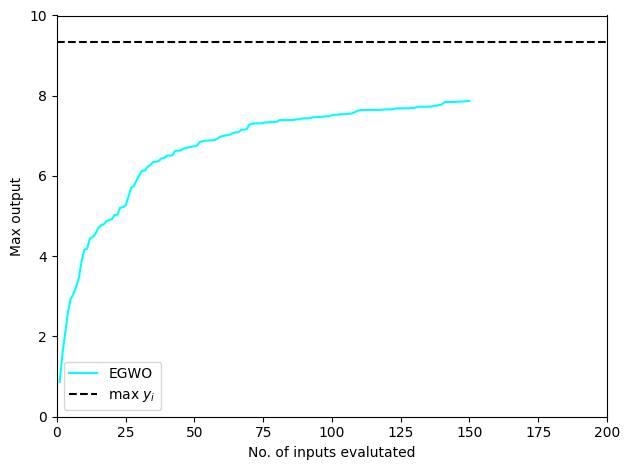

In [ ]:
import matplotlib.pyplot as plt

x_values = np.arange(1, TOTAL + 1)
print(x_values)

plt.figure()
plt.plot(x_values, y_max_mu, label="EGWO", clip_on=False, color="cyan")
plt.fill_between(TOTAL, np_y_max_mu - np_y_max_sig_bot, np_y_max_mu + np_y_max_sig_top, alpha=0.2, ec="None")

plt.xlabel('No. of inputs evalutated')
plt.ylabel('Max output')

plt.axhline(y=9.35, color="k", linestyle="--", label="$\max$ $y_i$", zorder=0)
plt.xlim([0, 200])
plt.ylim([0, 10])
plt.legend()

plt.tight_layout()
#plt.savefig("search_efficiency_for_specific_acquisition_run.pdf")
plt.show()